<a href="https://colab.research.google.com/github/gowtham-dd/Data-Science-Basics/blob/main/K_Means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


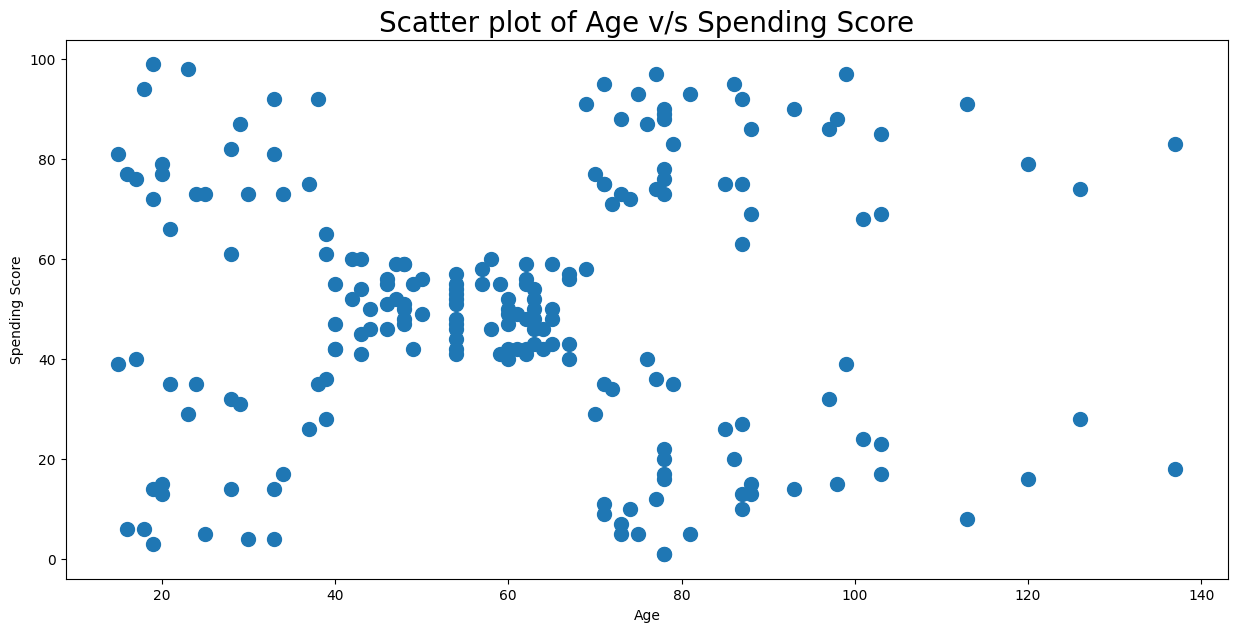

In [2]:
#2D Clustering based on Age and Spending Score¶
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of Age v/s Spending Score', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter( x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, s = 100)
plt.show()

In [5]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values


algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300,tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

y_kmeans = algorithm.fit_predict(X3)
df['cluster'] = pd.DataFrame(y_kmeans)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,5
2,3,Female,20,16,6,4
3,4,Female,23,16,77,5
4,5,Female,31,17,40,4


In [8]:
import plotly as py
import plotly.graph_objs as go




trace1 = go.Scatter3d(
  x= df['Age'],
  y= df['Spending Score (1-100)'],
  z= df['Annual Income (k$)'],
  mode='markers',
   marker=dict(
      color = df['cluster'],
         size= 10,
      line=dict(
          color= df['cluster'],
          width= 12
      ),
      opacity=0.8
   )
)
data = [trace1]
layout = go.Layout(
  title= 'Clusters wrt Age, Income and Spending Scores',
  scene = dict(
          xaxis = dict(title  = 'Age'),
          yaxis = dict(title  = 'Spending Score'),
          zaxis = dict(title  = 'Annual Income')
      )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

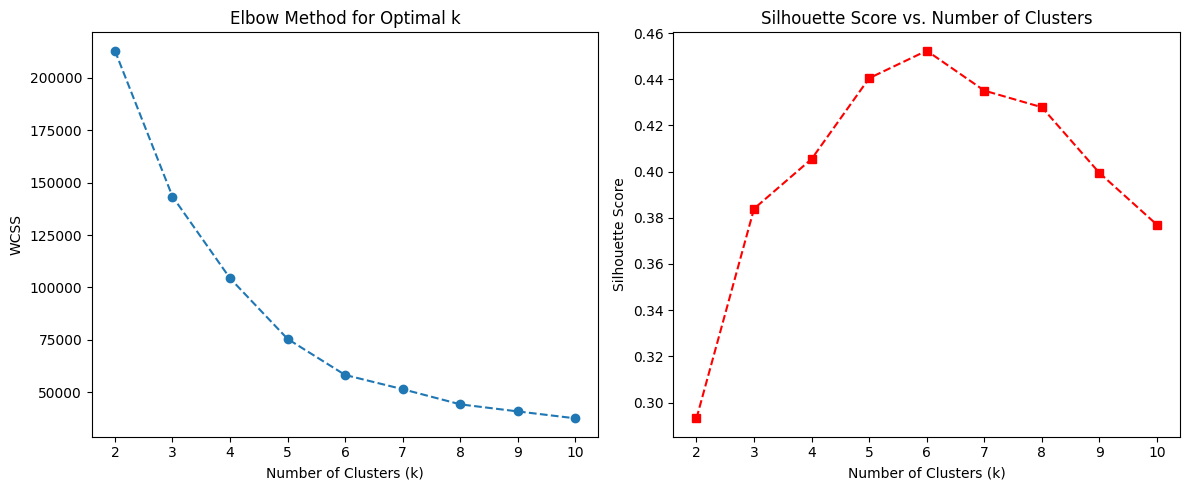

In [9]:
from sklearn.metrics import silhouette_score

# Elbow Method to determine optimal clusters
wcss = []
silhouette_scores = []


cluster_range = range(2, 11)  # Checking clusters from 2 to 10
for k in cluster_range:
   kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300,
                   tol=0.0001, random_state=111, algorithm='elkan')
   kmeans.fit(X3)
   wcss.append(kmeans.inertia_)  # Sum of squared distances
   silhouette_scores.append(silhouette_score(X3, kmeans.labels_))


# Plot Elbow Curve
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')


# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='s', linestyle='--', color='r')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')


plt.tight_layout()
plt.show()

